# Spotify Song Feature Analysis
# 
#### This analysis will investigate the chances of a song being considered popular based on its audio characteristics. 
#### Using data sourced from Kaggle, we will take into account danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time signature and duration, of the top 2024 Spotify songs.


### Imports

In [39]:
# import packages for data manipulation
import pandas as pd
import numpy as np

# import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import packages for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.datasets import make_classification

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### Load dataset

In [10]:
# Load dataset (without NAs)
df = pd.read_csv("data/spotify_songs_complete.csv")

### Find outliers in numeric columns

In [12]:
# Define a function to find outliers
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit  = q3 + 1.5 * iqr
    outliers = df[(df < lower_limit) | (df > upper_limit)]
    num_outliers = len(outliers) 
    return lower_limit, upper_limit, num_outliers


In [13]:
# Select only the numeric columns from df
col_list = ['danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration_min']

In [14]:
# Initialize lists to store results
lower_limits = []
upper_limits = []
num_outliers_list = []

In [15]:
# Loop through columns to find outliers
for column in col_list:
    lower_limit, upper_limit, num_outliers = iqr_outliers(df[column])
    lower_limits.append(lower_limit)
    upper_limits.append(upper_limit)
    num_outliers_list.append(num_outliers)

In [16]:
# Print results
for i, column in enumerate(col_list):
  print(f"Column: {column}")
  print(f"  Lower Limit: {lower_limits[i]}")
  print(f"  Upper Limit: {upper_limits[i]}")
  print(f"  Number of Outliers: {num_outliers_list[i]}")
  print("-" * 20)

Column: danceability
  Lower Limit: 0.3044999999999999
  Upper Limit: 1.0765000000000002
  Number of Outliers: 9308
--------------------
Column: energy
  Lower Limit: 0.2335000000000001
  Upper Limit: 1.0855
  Number of Outliers: 21565
--------------------
Column: key
  Lower Limit: -8.5
  Upper Limit: 19.5
  Number of Outliers: 0
--------------------
Column: loudness
  Lower Limit: -12.4195
  Upper Limit: -0.03950000000000031
  Number of Outliers: 43072
--------------------
Column: mode
  Lower Limit: -1.5
  Upper Limit: 2.5
  Number of Outliers: 0
--------------------
Column: speechiness
  Lower Limit: -0.06675
  Upper Limit: 0.21605000000000002
  Number of Outliers: 159046
--------------------
Column: acousticness
  Lower Limit: -0.48574999999999996
  Upper Limit: 0.9858499999999999
  Number of Outliers: 85
--------------------
Column: instrumentalness
  Lower Limit: -0.00011429999999999999
  Upper Limit: 0.00019049999999999997
  Number of Outliers: 318674
--------------------
Colum

#### Outliers in numeric columns
#
1. Danceability: 9,308
2. Energy: 21,565
3. Key: 0
4. Loudness: 43,072
5. Mode: 0
6. Speechiness: 159,046
7. Acousticness: 85
8. Instrumentalness: 318,674
9. Liveness: 96,866
10. Valence: 0
11. Tempo: 6,227
12. Time_signature: 147,302
13. Duration_min: 36,939

### Heatmap of selected columns

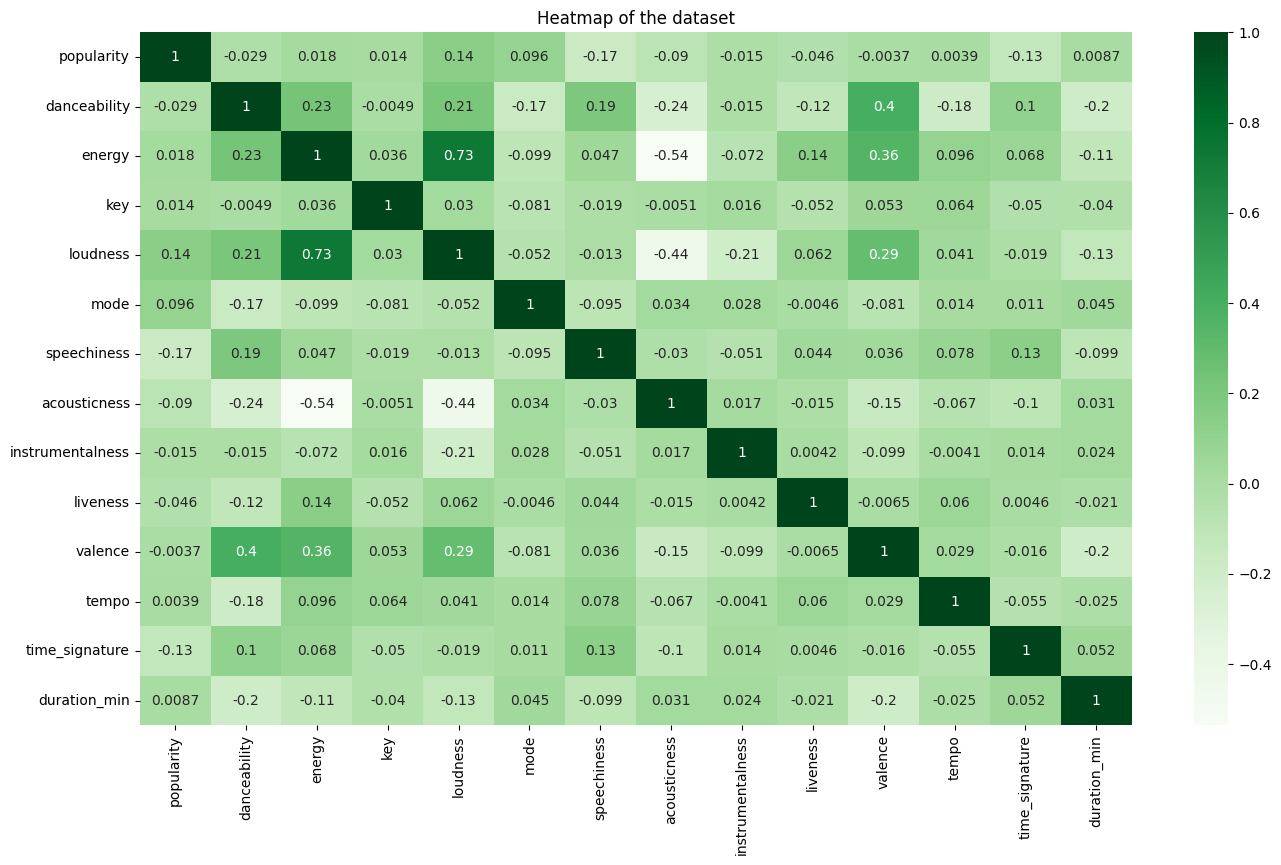

In [40]:
# Create a heatmap to see how correlated the variables are
plt.figure(figsize=(16, 9))
sns.heatmap(df[['popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration_min']].corr(), annot=True, cmap="Greens")
plt.title('Heatmap of the dataset')
plt.show()

 #### From the heatmap:
# 
* Loudness and energy show the highest correlation, 0.73
* Popularity shows the highest correlation with loudness, at 0.14
* Valence and danceability, 0.4
* Valence and energy, 0.36
* Valence and loudness, 0.29
* Danceability and energy, 0.23
* Danceability and loudness, 0.21
* Danceability and speechiness, 0.19

### Remove outliers from df

In [41]:
# Extract lower and upper limit from each column
lower_limit_dance = lower_limits[0]
upper_limit_dance = upper_limits[0]
lower_limit_energy = lower_limits[1]
upper_limit_energy = upper_limits[1]
lower_limit_loud = lower_limits[3]
upper_limit_loud = upper_limits[3]
lower_limit_speech = lower_limits[5]
upper_limit_speech = upper_limits[5]
lower_limit_acoustic = lower_limits[6]
upper_limit_acoustic = upper_limits[6]
lower_limit_inst = lower_limits[7]
upper_limit_inst = upper_limits[7]
lower_limit_live = lower_limits[8]
upper_limit_live = upper_limits[8]
lower_limit_tempo = lower_limits[10]
upper_limit_tempo = upper_limits[10]
lower_limit_time = lower_limits[11]
upper_limit_time = upper_limits[11]
lower_limit_dur = lower_limits[12]
upper_limit_dur = upper_limits[12]

# Make copy of df
df_1 = df

In [46]:
# Remove outliers
df_1 = df[(df["danceability"] >= lower_limit_dance) & (df["danceability"] <= upper_limit_dance) &
            (df["energy"] >= lower_limit_energy) & (df["energy"] <= upper_limit_energy) &
            (df["loudness"] >= lower_limit_loud) & (df["loudness"] <= upper_limit_loud) &
            (df["speechiness"] >= lower_limit_speech) & (df["speechiness"] <= upper_limit_speech) &
            (df["acousticness"] >= lower_limit_acoustic) & (df["acousticness"] <= upper_limit_acoustic) &
            (df["instrumentalness"] >= lower_limit_inst) & (df["instrumentalness"] <= upper_limit_inst) &
            (df["liveness"] >= lower_limit_live) & (df["liveness"] <= upper_limit_live) &
            (df["tempo"] >= lower_limit_tempo) & (df["tempo"] <= upper_limit_tempo) &
            (df["time_signature"] >= lower_limit_time) & (df["time_signature"] <= upper_limit_time) &
            (df["duration_min"] >= lower_limit_dur) & (df["duration_min"] <= upper_limit_dur)]

In [ ]:
# Check remaining rows
df_1.shape
# 800,304 rows remain
# 667,156 rows removed
# 45.5% of rows were removed

(800304, 25)

### Feauture Engineering

Right now popularity is a numeric column, to create the model we need a categorical column. To decide if a song is popular or not, it has to have at least 70 in the popularity scale, otherwise it is not popular.

In [49]:
# 70 or higher is popular
df_1 = df_1.assign(is_popular=df_1['popularity'].apply(lambda x: 1 if x >= 70 else 0))

### Construct the model

In [50]:
# Isolate the outcome variable
y = df_1["is_popular"]

In [51]:
# Display first few rows of outcome variable
y.head()

2     0
3     1
6     1
8     1
10    1
Name: is_popular, dtype: int64

In [ ]:
# Select the features
columns_to_drop = ["popularity", "spotify_id", "name", "artists", 
              "daily_rank", "daily_movement", "weekly_movement", 
              "country", "snapshot_date", "is_explicit", "album_name",
                "album_release_date", "is_popular"]
X = df_1.drop(columns=columns_to_drop)

X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
2,0.707,0.575,2,-7.546,1,0.1250,0.25100,0.000000,0.2480,0.576,138.008,4,2.959967
3,0.874,0.672,0,-5.568,1,0.1980,0.02060,0.000000,0.0783,0.711,103.921,4,2.633200
6,0.554,0.808,1,-4.169,1,0.0368,0.21400,0.000000,0.1590,0.372,108.548,4,2.771667
8,0.660,0.756,0,-3.743,0,0.0320,0.00289,0.000000,0.1930,0.838,116.034,4,2.848117
10,0.494,0.413,11,-10.432,1,0.0254,0.68200,0.000067,0.1930,0.273,94.938,4,3.532967


In [ ]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [60]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [61]:
# Get beta coefficients for independent variables
log_clf.coef_

array([[-9.00849314e-01, -3.61062428e+00, -7.06326844e-03,
         3.24872207e-01,  3.90766756e-01, -2.52621136e+00,
        -1.25450213e+00,  1.89204164e-03, -6.90319938e-01,
         4.86067690e-01, -6.85945825e-03,  1.53506433e+00,
         1.19932697e-01]])

In [62]:
# Get beta 0
log_clf.intercept_

array([0.38683527])

In [63]:
# Get odds ratio
danceability_odds = np.exp(log_clf.coef_[0][0])
energy_odds = np.exp(log_clf.coef_[0][1])
key_odds = np.exp(log_clf.coef_[0][2])
loudness_odds = np.exp(log_clf.coef_[0][3])
mode_odds = np.exp(log_clf.coef_[0][4])
speech_odds = np.exp(log_clf.coef_[0][5])
acoustic_odds = np.exp(log_clf.coef_[0][6])
instrumental_odds = np.exp(log_clf.coef_[0][7])
liveness_odds = np.exp(log_clf.coef_[0][8])
valence_odds = np.exp(log_clf.coef_[0][9])
tempo_odds = np.exp(log_clf.coef_[0][10])
time_odds = np.exp(log_clf.coef_[0][11])
duration_odds = np.exp(log_clf.coef_[0][12])

In [ ]:
# Print values for interpretation
print(f"Danceability: {danceability_odds:.5f}")
print(f"Energy: {energy_odds:.5f}")
print(f"Key: {key_odds:.5f}")
print(f"Loudness: {loudness_odds:.5f}")
print(f"Mode: {mode_odds:.5f}")
print(f"Speechiness: {speech_odds:.5f}")
print(f"Acousticness: {acoustic_odds:.5f}")
print(f"Instrumentalness: {instrumental_odds:.5f}")
print(f"Liveness: {liveness_odds:.5f}")
print(f"Valence: {valence_odds:.5f}")
print(f"Tempo: {tempo_odds:.5f}")
print(f"Time_signature: {time_odds:.5f}")
print(f"Duration_min: {duration_odds:.5f}")

Danceability: 0.40622
Energy: 0.02703
Key: 0.99296
Loudness: 1.38385
Mode: 1.47811
Speechiness: 0.07996
Acousticness: 0.28522
Instrumentalness: 1.00189
Liveness: 0.50142
Valence: 1.62591
Tempo: 0.99316
Time_signature: 4.64162
Duration_min: 1.12742


#### By considering all the other variables constant:
* With a one-unit increase in danceability, the odds of a song being popular decrease by 60%
* With a one-unit increase in energy, the odds of a song being popular decrease by 97%
* A one-unit increase in key means the odds of a song being popular decrease by 0.704%
* A one-unit increase in loudness means the odds of a song being popular increase by 38%
* A one-unit increase in mode means the odds of a song being popular increase by 48%
* With a one-unit increase in speechinees, the odds of a song being popular decrease by 93%
* With a one-unit increase in acousticness, the odds of a song being popular decrease by 71%
* With a one-unit increase in instrumentalness, the odds of a song being popular increase by 0.189%
* A one-unit increase in liveness means the odds of a song being popular decrease by 0.5%
* A one-unit increase in valence means the odds of a song being popular increase by 63%
* A one-unit increase in tempo means the odds of a song being popular decrease 0.683%
* With a one-unit increase in time signature, the odds of a song being popular increase by 464%
* With a one-unit increase in duration, the odds of a song being popular increase by 13%

In [67]:
# Test the model
y_pred = log_clf.predict(X_test)

In [68]:
# Print out the predicted labels
log_clf.predict(X_test)

array([1, 1, 0, ..., 1, 1, 1], shape=(200076,))

In [69]:
# Print out the predicted probabilities
y_pred_proba = log_clf.predict_proba(X_test)[::,-1]

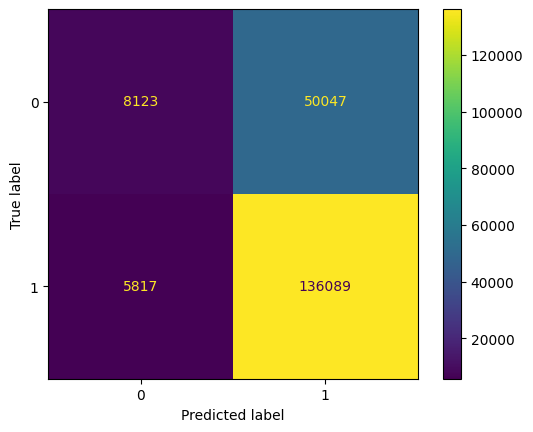

In [70]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
display_labels=log_clf.classes_)
# Plot confusion matrix
log_disp.plot(values_format='')
# Display plot
plt.show()

#### From the confusion matrix, out of the 200, 076 observations
* 136,089 (68%) were correctly predicted as true 
* 50,047 (25%) were incorrectly predicted as true
* 8,123 (4%) were correctly predicted as false
* 5817 (3%) were incorrectly predicted as false


In [75]:
df_1["is_popular"].value_counts(normalize=True)

is_popular
1    0.709259
0    0.290741
Name: proportion, dtype: float64

### From the data set <br>
~71% of the songs are considered as popular<br>
~29% are not considered popular<br>
This is not the most balanced dataset, but given than major issues only arise when the majority class makes up for the 90% or more of the dataset, then we can proceed with this percentage.

### Model interpretation

#### Model performance evaluation using metrics

In [76]:
# Create classification report for logistic regression model
target_names = ["Predicted would not be popular", "Predicted would be popular"]
print(classification_report(y_test, y_pred, target_names=target_names))


                                precision    recall  f1-score   support

Predicted would not be popular       0.58      0.14      0.23     58170
    Predicted would be popular       0.73      0.96      0.83    141906

                      accuracy                           0.72    200076
                     macro avg       0.66      0.55      0.53    200076
                  weighted avg       0.69      0.72      0.65    200076



We can see the model works best at predicting songs that would be popular. <br>
* Precision <br>
    * 73% of the observations predicted as would be popular were correct
    * 58% of the observations predicted as would not be popular were correct
* Recall
    * 96% of the instances predicted as would be popular were correct
    * 14% of the instances predicted as would not be popular were correct
* F1-score
    * 83% of the observations predicted as would be popular were correct
    * 23% of the observations predicted as would not be popular were correct

The overall accuracy shows that the model correctly predicted 72% of the instances.

#### Beta coefficients

Loudness, mode, valence, time signature and duration present the highest probabilities of making a song popular.<br>
The odds of danceability and energy seem strange. Mostly energy showing a decrease of 98%.

### ROC curve

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

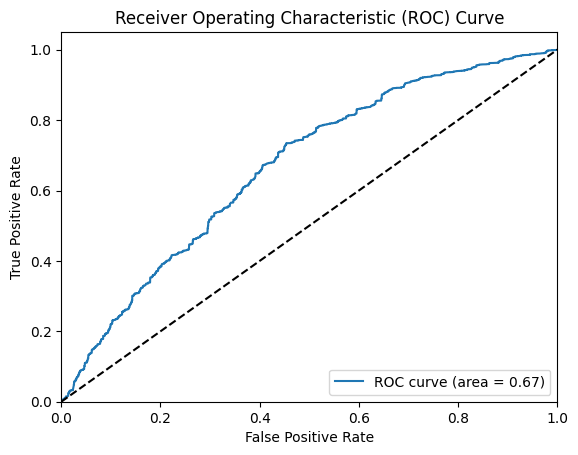

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Corrected line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Conclusions, Recommendations, and next steps

* <b>Conclusions</b>

<p style="text-align: justify;">
Based on model results, the variables that show higher odds of improving popularity are: loudness, mode, valence, time signature, and duration. The beta coefficients show that danceability and energy have a negative impact on popularity, meaning that if there is a one-unit increase in either one of them, the odds of popularity decreasing are 60% and 97%, respectively.
The model worked best at predicting the songs that would be popular. For precision, 73% of the observations predicted as “would be popular” were correct, and 60% of the observations predicted as “would not be popular” were correct. Recall had 96% where the instances predicted as “would be popular” were correct, and 14% of the instances predicted as “would not be popular” were correct. For F1-score: 83% of the observations predicted as “would be popular” were correct, and 23% of the observations predicted as “would not be popular” were correct.
The overall accuracy shows that the model correctly predicted 72% of the instances.
The Confusion Matrix shows that 68% of the test observations were correctly predicted as true, 25% were incorrectly predicted as true, 4% were correctly predicted as false, and 3% were incorrectly predicted as false.
The ROC curve shows that the AUC is 0.67 which indicates a fair model performance. The curve shows the trade-off between TPR and FPR at different classification thresholds. As the threshold decreases, more cases are classified as positive, leading to an increase in both TPR and FPR. Overall, performance could be improved.
</p>

* <b>Recommendations</b>

Recommended song features to keep in mind to increase the popularity of a song:

   * Loudness: The overall loudness of the song in decibels. The consideration should be to have a high loudness level.
   * Mode: Indicates whether the song is a major or minor key. The database shows most songs (53.6%) have a major key.
   * Valence: A measure of the musical positiveness conveyed by the song. A high-valence song (happy, cheerful, euphoric) would increase the chances of it becoming popular.
   * Time signature: The estimated overall time signature of the song. A time signature of 4 or 5 would do best to increase the chances of the song being popular.
   * Duration: the duration of the song. The model indicates that a one-unit increase in duration increases the odds of popularity by 13%, given that this percentage is not too high it should only work as a side note to take into account when considering song duration. 

* <b>Next Steps</b>

    * The model shows a decent accuracy, and it works best at predicting songs that would be popular. So overall the performance could be improved.
    * Danceability and energy results seem a little off given that the top songs’ averages for these two variables are high. A second run would be best to confirm these two features really can have such a negative impact on song popularity.
